# Vježbe 3 - dio 2
 - SVM algoritam
 - Uvod u logističku regresiju

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

plt.rcParams["figure.figsize"] = (6, 6)

## Što je SVM?
 - perceptron klasificira linearno separabilan skup podataka
 - osim same klasifikacijske hiperravnine, želimo pronaći hiperravninu koja **maksimizira** geometrijsku marginu
 - ako perceptron natreniramo na nekom skupu podataka, velika geometrijska margina nam "osigurava" da nove, neviđene točke budu točno klasificirane
 - kako bismo pronašli takvu hiperravninu, moramo postaviti nekakav optimizacijski problem
 - ako su podaci linearno separabilni hiperravninom kroz ishodište, onda postoje $\Theta \in \mathbb{R}^n$ i $\gamma > 0$ takvi da $y^{(i)}\Theta^T x^{(i)} \geq \gamma, \text{ } i = 1, 2, \dots, m$
 - optimizacijski problem možemo postaviti kao
 $$
 \textrm{argmax}_{\gamma, \Theta}\frac{\gamma}{||\Theta||}
 $$
 
 $$
 \text{  uz uvjet  } y^{(i)}\Theta^T x^{(i)} \geq \gamma, \text{ }  i = 1, 2, \dots, m,
 $$
 što se može svesti na 
 $$
 \textrm{argmin}_{\gamma, \Theta}\frac{1}{2}\left(\frac{||\Theta||}{\gamma}\right)^2
 $$
 
 $$
 \text{  uz uvjet  } y^{(i)}\Theta^T x^{(i)} \geq \gamma, \text{ }  i = 1, 2, \dots, m,
 $$
 odnosno
 $$
 \textrm{argmin}_{\Theta}\frac{1}{2}||\Theta||^2
 $$
 
 $$
 \text{  uz uvjet  } y^{(i)}\Theta^T x^{(i)} \geq 1, \text{ }  i = 1, 2, \dots, m,
 $$
 
 - problem se može generalizirati na hiperravninu koja ne prolazi ishodištem
 $$
 \textrm{argmin}_{\Theta, \theta_0}\frac{1}{2}||\Theta||^2
 $$
 
 $$
 \text{  uz uvjet  } y^{(i)}(\Theta^T x^{(i)} + \theta_0) \geq 1, \text{ }  i = 1, 2, \dots, m,
 $$
 
 - ako podaci **nisu linearno separabilni**, dozvoljavamo kršenje uvjeta, ali uz penalizaciju koju je potrebno minimizirati
 $$
 \textrm{argmin}_{\Theta, \theta_0, \xi_i}\frac{1}{2}||\Theta||^2 + C\sum\limits_{i=1}^m \xi_i
 $$
 
 $$
 \text{  uz uvjet  } y^{(i)}(\Theta^T x^{(i)} + \theta_0) \geq 1 - \xi_i \textrm{ i } \xi_i \geq 0, \text{ }  i = 1, 2, \dots, m,
 $$

### Scikit-learn implementacija SVM-a
Dostupne su implementacije nekoliko algoritama: [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVC) i [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC).

Implementacije se razlikuju po algoritmima koje koriste. SVC koristi libsvm, dok LinearSVC koristi liblinear te je puno efikasniji.

Možemo dodatno proslijediti **kernel** koji transformira točke u višu dimenziju, ali o tome na nekim kasnijim vježbama.

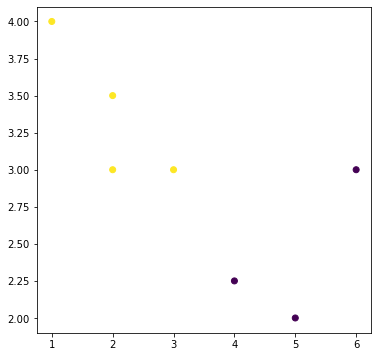

In [3]:
X = np.array([[2,3.5], [2,3], [1,4], [3,3], [5,2], [4,2.25], [6,3]])
y = np.array([1, 1, 1, 1, -1, -1, -1])

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [11]:
clf = SVC(kernel='linear')
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(1 / np.linalg.norm(clf.coef_))

[[0.78329227 0.33187306]]
[0.64662604]
1.1755057665267221


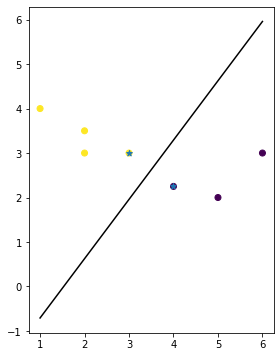

In [5]:
xx = np.linspace(1, 6, 100)
yy = -(clf.coef_[0][0] / clf.coef_[0][1]) * xx - clf.intercept_[0] / clf.coef_[0][1]
plt.plot(xx, yy, 'k-')
plt.gca().set_aspect('equal')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], marker='*')
plt.show()

### Koliko je LinearSVC brži od SVC?
Koristimo `%%time` cell magic za mjerenje vremena izvršavanja ćelije.

In [6]:
X, y = make_blobs(n_samples=500000, centers=[(2, 2), (-2, -2)], n_features=2, random_state=1)

In [7]:
%%time
clf = SVC(kernel='linear')
clf.fit(X, y)

Wall time: 1min 9s


SVC(kernel='linear')

In [8]:
%%timeit
clf = LinearSVC()
clf.fit(X, y)

886 ms ± 116 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Zadatak
Generirajte $10^5$ točaka i usporedite brzinu SVC i LinearSVC algoritama. Koristite `%%timeit` cell magic umjesto `%%time` da dobijete prosječno vrijeme izvršavanja.

Nakon vježbi pokušajte generirati $10^6$ točaka i provedite isti test.

### LinearSVC ne računa potporne vektore
Pokušat ćemo ih odrediti ručno i naučiti koristiti još neke `matplotlib.pyplot` funkcije. Potporni vektori su oni za koje vrijedi
$$
\Theta^Tx + \theta_0 \leq 1.
$$

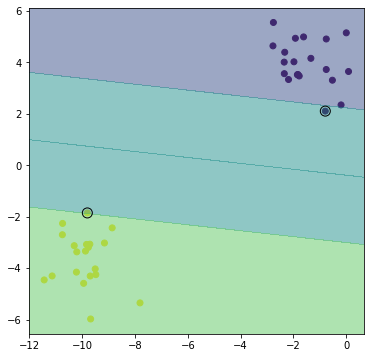

In [9]:
X, y = make_blobs(n_samples=40, centers=2, random_state=1)
clf = LinearSVC(random_state=0).fit(X, y)
dec_func = clf.decision_function(X)
support_vector_indices = np.where(np.abs(dec_func) <= 1 + 1e-15)
support_vectors = X[support_vector_indices]

plt.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 1000),
                     np.linspace(ylim[0], ylim[1], 1000))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-100, -1,0,1, 100], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, linewidth=1,
           facecolors='none', edgecolors='k')

## Što je logistička regresija?
- za model funkciju koristimo logističku (sigmoidnu) funkciju $\sigma : \mathbb{R} \to \mathbb{R}$, zadanu s $\sigma(x) = \frac{1}{1+\exp{(-x)}}$
- model funkcija je oblika $h_{\Theta}(x) = \sigma(\Theta^Tx) = \frac{1}{1+\exp{(-\Theta^Tx)}}$
- sigmoidna funkcija preslikava sve na interval $\langle 0,1 \rangle$ pa izlaznu vrijednost interpretiramo kao vjerojatnost da podatak $x$ s obzirom na parametar $\theta$ pripada klasi $1$
- kao u SVM ili perceptron modelu, $\Theta$ definira hiperravninu koja klasificira podatke, sve što je "ispod" je klasa 0, sve "iznad" klasa 1

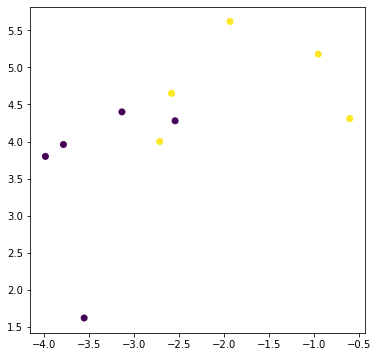

In [10]:
X = np.array([[-3.78,3.96],[-3.98,3.8],[-0.95,5.18],[-2.71,4],[-0.6,4.31],[-2.58,4.65],[-2.54,4.28],[-3.55,1.62],[-3.13,4.4],[-1.93,5.62]])
y = np.array([-1, -1, 1, 1, 1, 1, -1, -1, -1, 1])

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

### O funkcijama gubitka i cilja pričamo na sljedećim vježbama!